#### ML Final Project: House Price Prediction by Krutin Rathod and Sanika Mhadgut (Group - 4)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML Project/test.csv")
print(df_test.shape)
df.head()

(438, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,2Story,4,5,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,Unf,0,Unf,0,755,755,GasA,TA,Y,SBrkr,755,755,0,1510,1,0,1,0,4,1,TA,7,Typ,1,Gd,Detchd,1940.0,Unf,1,296,Fa,Po,P,120,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672,ALQ,690,0,1362,GasA,TA,Y,SBrkr,1382,0,0,1382,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1991.0,Unf,2,884,TA,TA,Y,0,0,252,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1039,Unf,0,208,1247,GasA,Ex,Y,SBrkr,1247,0,0,1247,1,0,1,1,1,1,Gd,4,Typ,1,Gd,Attchd,2005.0,Fin,2,550,TA,TA,Y,0,84,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1957,1957,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,708,Unf,0,108,816,GasA,TA,Y,FuseA,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


In [ ]:
df_test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1436,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
1,959,960,160,FV,24.0,2572,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,1999,1999,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,604,Unf,0,92,696,GasA,Ex,Y,SBrkr,696,720,0,1416,1,0,2,1,3,1,Gd,6,Typ,0,NaN,Detchd,1999.0,Unf,2,484,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,155000
2,441,442,90,RL,92.0,12108,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,4,1955,1955,Gable,CompShg,VinylSd,VinylSd,BrkFace,270.0,TA,TA,CBlock,TA,TA,No,ALQ,133,Unf,0,1307,1440,GasA,TA,N,FuseF,1440,0,0,1440,0,0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,118000
3,536,537,60,RL,57.0,8924,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,880,880,GasA,Ex,Y,SBrkr,880,844,0,1724,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,Fin,2,527,TA,TA,Y,120,155,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,188000
4,488,489,190,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,1.5Fin,5,4,1900,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,Fa,No,BLQ,664,Unf,0,290,954,GasA,TA,N,FuseA,1766,648,0,2414,0,0,2,0,3,2,TA,10,Mod,1,Gd,Attchd,1970.0,Unf,2,520,TA,Fa,N,142,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1022 non-null   int64  
 1   Id             1022 non-null   int64  
 2   MSSubClass     1022 non-null   int64  
 3   MSZoning       1022 non-null   object 
 4   LotFrontage    842 non-null    float64
 5   LotArea        1022 non-null   int64  
 6   Street         1022 non-null   object 
 7   Alley          60 non-null     object 
 8   LotShape       1022 non-null   object 
 9   LandContour    1022 non-null   object 
 10  Utilities      1022 non-null   object 
 11  LotConfig      1022 non-null   object 
 12  LandSlope      1022 non-null   object 
 13  Neighborhood   1022 non-null   object 
 14  Condition1     1022 non-null   object 
 15  Condition2     1022 non-null   object 
 16  BldgType       1022 non-null   object 
 17  HouseStyle     1022 non-null   object 
 18  OverallQ

In [ ]:
df.shape

(1022, 82)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [ ]:
df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,842.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1015.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,968.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,729.223092,730.223092,56.149706,70.261283,10306.330724,6.112524,5.564579,1971.557730,1984.930528,102.175369,443.432485,47.929550,568.239726,1059.601761,1166.794521,337.803327,5.755382,1510.353229,0.430528,0.057730,1.566536,0.375734,2.863992,1.041096,6.504892,0.614481,1978.457645,1.774951,472.549902,93.991194,44.808219,20.854207,3.811155,15.141879,2.869863,29.015656,6.389432,2007.820939,181123.119374
std,428.530232,428.530232,41.215899,24.847801,9635.841640,1.404505,1.110557,29.823413,20.930978,179.987735,461.804349,161.199583,444.253839,457.327726,397.709284,428.528123,46.359630,516.531047,0.518575,0.241595,0.544742,0.500458,0.800401,0.203481,1.587622,0.642980,25.058118,0.735446,209.407113,125.412155,62.973390,60.358181,31.177269,55.037574,41.479727,310.960859,2.728133,1.313022,81038.559207
min,0.000000,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,351.250000,352.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,218.500000,785.000000,874.250000,0.000000,0.000000,1134.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,740.000000,741.000000,50.000000,70.000000,9410.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,383.500000,0.000000,485.000000,991.000000,1088.000000,0.000000,0.000000,1471.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.750000,1100.750000,70.000000,80.000000,11433.250000,7.000000,6.000000,2001.000000,2004.000000,164.500000,701.500000,0.000000,798.000000,1311.500000,1411.750000,723.750000,0.000000,1775.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1459.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,514.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,502.000000,552.000000,508.000000,396.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.isna().sum()

Unnamed: 0         0
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      180
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0         int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 82, dtype: object

In [ ]:
df.iloc[0]

Unnamed: 0           64
Id                   65
MSSubClass           60
MSZoning             RL
LotFrontage         NaN
                  ...  
MoSold                2
YrSold             2009
SaleType             WD
SaleCondition    Normal
SalePrice        219500
Name: 0, Length: 82, dtype: object

* Let's segregate the columns according to the data types

In [ ]:
column_types = df.dtypes

object_columns = column_types[column_types == 'object'].index.tolist()
integer_columns = column_types[column_types == 'int64'].index.tolist()
float_columns = column_types[column_types == 'float64'].index.tolist()

print("Object Columns:", object_columns)
print("Integer Columns:", integer_columns)
print("Float Columns:", float_columns)

Object Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer Columns: ['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

In [ ]:
df["BldgType"].value_counts()

1Fam      861
TwnhsE     78
Duplex     36
Twnhs      28
2fmCon     19
Name: BldgType, dtype: int64

In [ ]:
df.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1022,1022,60,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1015,1022,1022,1022,993,993,992,993,992,1022,1022,1022,1022,1022,1022,542,968,968,968,968,1022,5,198,32,1022,1022
unique,5,2,2,4,4,2,5,3,24,9,8,5,8,6,7,13,15,4,4,5,6,4,4,4,6,6,5,5,2,5,4,6,5,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,808,1017,35,647,920,1021,729,963,159,875,1009,861,513,798,1003,363,352,607,624,901,459,453,913,655,299,874,998,530,950,937,501,945,284,607,421,918,933,946,2,110,29,890,840


In [ ]:
df["PoolQC"].isna().sum()

1017

In [ ]:
df.describe(include="int64")

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,729.223092,730.223092,56.149706,10306.330724,6.112524,5.564579,1971.557730,1984.930528,443.432485,47.929550,568.239726,1059.601761,1166.794521,337.803327,5.755382,1510.353229,0.430528,0.057730,1.566536,0.375734,2.863992,1.041096,6.504892,0.614481,1.774951,472.549902,93.991194,44.808219,20.854207,3.811155,15.141879,2.869863,29.015656,6.389432,2007.820939,181123.119374
std,428.530232,428.530232,41.215899,9635.841640,1.404505,1.110557,29.823413,20.930978,461.804349,161.199583,444.253839,457.327726,397.709284,428.528123,46.359630,516.531047,0.518575,0.241595,0.544742,0.500458,0.800401,0.203481,1.587622,0.642980,0.735446,209.407113,125.412155,62.973390,60.358181,31.177269,55.037574,41.479727,310.960859,2.728133,1.313022,81038.559207
min,0.000000,1.000000,20.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,351.250000,352.250000,20.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,218.500000,785.000000,874.250000,0.000000,0.000000,1134.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,740.000000,741.000000,50.000000,9410.500000,6.000000,5.000000,1972.000000,1994.000000,383.500000,0.000000,485.000000,991.000000,1088.000000,0.000000,0.000000,1471.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.750000,1100.750000,70.000000,11433.250000,7.000000,6.000000,2001.000000,2004.000000,701.500000,0.000000,798.000000,1311.500000,1411.750000,723.750000,0.000000,1775.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,514.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,4.000000,1418.000000,736.000000,502.000000,552.000000,508.000000,396.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.describe(include="float64")

,LotFrontage,MasVnrArea,GarageYrBlt
count,842.000000,1015.000000,968.000000
mean,70.261283,102.175369,1978.457645
std,24.847801,179.987735,25.058118
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,70.000000,0.000000,1980.000000
75%,80.000000,164.500000,2003.000000
max,313.000000,1600.000000,2010.000000


In [ ]:
print("Train Dataset contains ",df.shape[0],"Rows & ",df.shape[1],"columns.")
print("Test Dataset contains ",df_test.shape[0],"Rows & ",df_test.shape[1],"columns.")

Train Dataset contains  1022 Rows &  82 columns.
Test Dataset contains  438 Rows &  82 columns.


## Feature Engineering & Selection

In [ ]:
df_train = df
df_test = df_test

In [ ]:
df_train.shape

(1022, 82)

In [ ]:
df_test.shape

(438, 82)

In [ ]:
df = pd.concat([df_train,df_test]).reset_index(drop=True)

df.shape
# (1460, 82)

(1460, 82)

* To drop the highly correlated features from the dataset
* This all will be removed, '1stFlrSF', 'GarageArea', 'GarageYrBlt', 'Id', 'TotRmsAbvGrd'

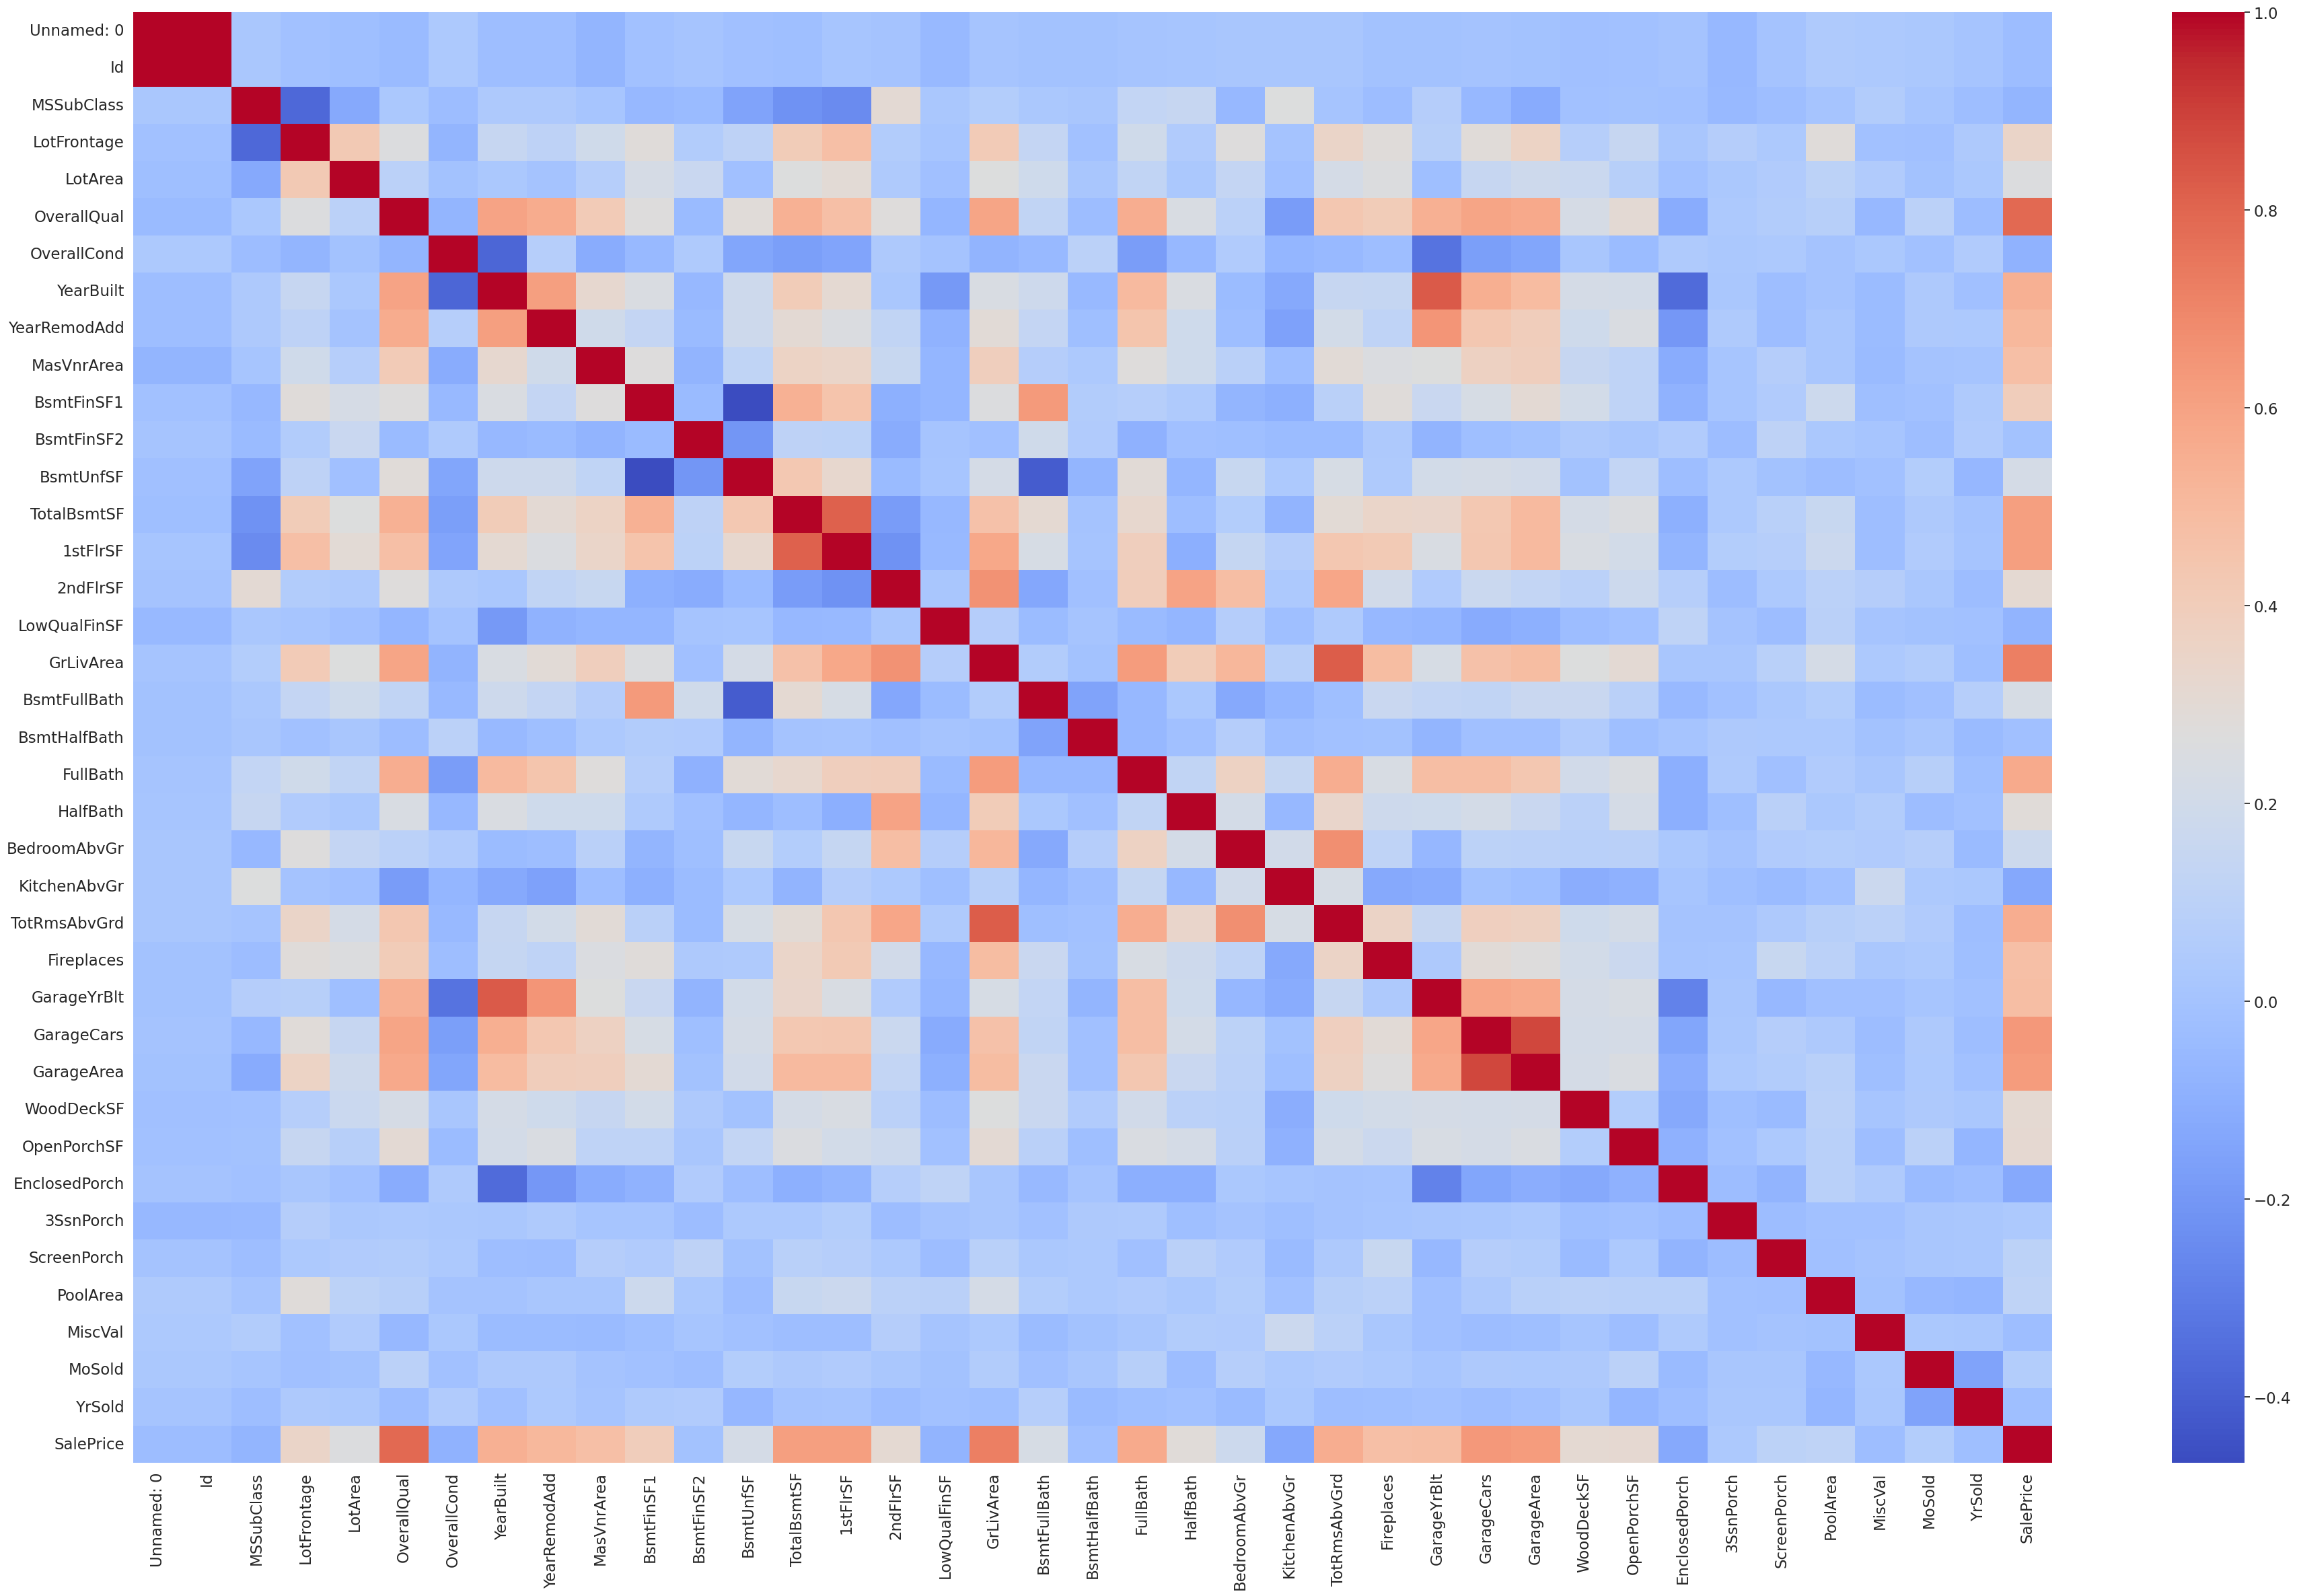

In [ ]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(46, 28))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.show()

In [ ]:
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'Id', 'TotRmsAbvGrd'}

* Some of the above mentioned features seems useful.
* Hence we will only drop Id, GarageYrBlt and GarageArea as we already have the house year build date and also the number of cars in a garage, which is more important feature

In [ ]:
drop = ['GarageYrBlt', 'Id']
df.drop(columns = drop,inplace = True)

In [ ]:
df.shape

(1460, 80)

In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Woo

* Let's see the features having null values

In [ ]:
countMissing = df.isnull().sum().sort_values(ascending=False)
percentMissing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
nullCount = pd.concat([countMissing, percentMissing], axis=1, keys=['Total', 'Percent'])
nullCount.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [ ]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]
df.drop(columns=cols, inplace=True)

* Removed above columns as they have huge amount of missing values

In [ ]:
df.shape

(1460, 75)

In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',

In [ ]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,0,2,2009,WD,Normal,219500
1,651,70,RL,60.0,9084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,2Story,4,5,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,Unf,0,Unf,0,755,755,GasA,TA,Y,SBrkr,755,755,0,1510,1,0,1,0,4,1,TA,7,Typ,1,Detchd,Unf,1,296,Fa,Po,P,120,0,0,0,0,0,0,10,2009,WD,Normal,108000
2,260,80,RL,120.0,19296,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672,ALQ,690,0,1362,GasA,TA,Y,SBrkr,1382,0,0,1382,1,0,1,0,3,1,TA,6,Typ,1,Attchd,Unf,2,884,TA,TA,Y,0,0,252,0,0,0,0,5,2009,WD,Normal,176000
3,1089,120,FV,37.0,3316,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1039,Unf,0,208,1247,GasA,Ex,Y,SBrkr,1247,0,0,1247,1,0,1,1,1,1,Gd,4,Typ,1,Attchd,Fin,2,550,TA,TA,Y,0,84,0,0,0,0,0,4,2006,WD,Normal,197000
4,1112,20,RL,73.0,7100,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1957,1957,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,708,Unf,0,108,816,GasA,TA,Y,FuseA,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,Detchd,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Normal,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,293,60,RL,NaN,16659,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosA,Norm,1Fam,2Story,7,7,1977,1994,Gable,CompShg,Plywood,Plywood,BrkFace,34.0,TA,TA,CBlock,TA,TA,No,ALQ,795,Unf,0,0,795,GasA,Fa,Y,SBrkr,1468,795,0,2263,1,0,2,1,3,1,Gd,9,Typ,1,Attchd,Fin,2,539,TA,TA,Y,0,250,0,0,0,0,0,3,2006,WD,Normal,235000
1456,561,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071,LwQ,123,195,1389,GasA,Gd,Y,SBrkr,1389,0,0,1389,1,0,1,0,2,1,TA,6,Typ,1,Attchd,RFn,2,418,TA,TA,Y,240,38,0,0,0,0,0,4,2006,WD,Normal,170000
1457,339,20,RL,66.0,12400,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,6,7,1958,1998,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,176.0,TA,TA,CBlock,TA,Fa,No,Rec,585,Unf,0,630,1215,GasA,TA,Y,FuseA,1215,0,0,1215,0,0,1,0,3,1,TA,6,Typ,0,Attchd,Unf,1,297,TA,TA,Y,0,0,0,0,234,0,0,6,2009,WD,Normal,155000
1458,987,20,RL,83.0,10159,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,450.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1646,Unf,0,284,1930,GasA,Ex,Y,SBrkr,1940,0,0,1940,1,0,2,1,3,1,Ex,8,Typ,1,Attchd,Fin,3,606,TA,TA,Y,168,95,0,0,0,0,0,4,2010,New,Partial,395192


In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',

* Filling Missing Values in Features realted to Garage & Basement.

In [ ]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

In [ ]:
df.describe(include="object")

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


* For the LotFrontage column, we will fill the missing values by the lotfrontage values from the similar neighborhood.
* As most of the houses in a particular neighborhood have same area of lotfrontage
* Similarly for masonry veneer, we can impute according to the masonry area, as it has similar values

In [ ]:
df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.shape

(1460, 75)

### Feature Engineering

* We can modify the features related to the construction of the house
* As the years and all is time frame based data we need to do something and turn it into meaningful deature
* Many houses have undergone renovation
* The newly renovated house are priced higher, hence we will add that column as feature in our dataset

In [ ]:
df['isRenovated'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

df['houseAge'] = df['YrSold'] - df['YearBuilt']

df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)

In [ ]:
df.shape

(1460, 74)

* Combining the number of bathrooms in the houses

In [ ]:
df["totBathrooms"] = (df["FullBath"] + (0.5 * df["HalfBath"]) +
                               df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]))

df.drop(columns=["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"],inplace=True)

In [ ]:
df.shape

(1460, 71)

In [ ]:
df["totBathrooms"]

0       3.5
1       2.0
2       2.0
3       2.5
4       2.0
       ... 
1455    3.5
1456    2.0
1457    1.0
1458    3.5
1459    1.0
Name: totBathrooms, Length: 1460, dtype: float64

* Similarly combining the Porch Area of the houses

In [ ]:
df['totPorchSqft'] = (df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] +
                              df['ScreenPorch'] + df['WoodDeckSF'])

drop = ["3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","OpenPorchSF"]

df.drop(columns=drop,inplace=True)

In [ ]:
df.shape

(1460, 67)

In [ ]:
df['totPorchSqft']

0       612
1       120
2       252
3        84
4         0
       ... 
1455    250
1456    278
1457    234
1458    263
1459    100
Name: totPorchSqft, Length: 1460, dtype: int64

In [ ]:
df["TotalBsmtSF"]

0       1057
1        755
2       1362
3       1247
4        816
        ... 
1455     795
1456    1389
1457    1215
1458    1930
1459     686
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [ ]:
df['totSqrFt']=(df['BsmtFinSF1']+df['BsmtFinSF2']+df['2ndFlrSF'])

cols = ["BsmtFinSF2","BsmtUnfSF", '2ndFlrSF']
df.drop(columns=cols,inplace=True)

In [ ]:
df.shape

(1460, 65)

* We can combine the Heating & HeatingQC columns and create a new column called heatingQualCond

In [ ]:
df["heatingQualCond"] = df["Heating"] + "-" + df["HeatingQC"]

df.drop(columns=["Heating","HeatingQC"],inplace=True)

In [ ]:
df.shape

(1460, 64)

* The numerical columns can be converted into categorical by checking if they are non-zero.
* As in a house, having a basement and fireplace is important compared to the number of basements and fireplaces we converted it into the booleans

In [ ]:
def boolean_feature(df):
    df["HasBsmt"] = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int)
boolean_feature(df)

In [ ]:
df.drop(columns=["Fireplaces"],inplace = True)

In [ ]:
df.shape

(1460, 65)

In [ ]:
cols = ["MiscVal","LowQualFinSF","PoolArea"]
df.drop(columns=cols, inplace=True)
df.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
df["Exterior1st"].describe()

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object

In [ ]:
df["Neighborhood"].describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

In [ ]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","heatingQualCond"]
for column in cols:
    data = df.groupby(column)["SalePrice"].mean()
    for value in data.index:
        df[column] = df[column].replace({value:data[value]})

* Converting Categorical columns into numerical columns

In [ ]:
df.shape

(1460, 61)

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'isRenovated',
       'houseAge', 'totBathrooms', 'totPorchSqft', 'totSqrFt',
       'heatingQualCond', 'HasBsmt', 'HasFirePlace'],
      dtype='object')

In [ ]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

cat = LabelEncoder()

df[cols] = df[cols].apply(cat.fit_transform)

In [ ]:
cols = df.select_dtypes(include="object").columns
cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'CentralAir', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

* Performing one hot-encoding on the dataset

In [ ]:
df=df.dropna()

In [ ]:
# throw error

### Let's find the important features of the dataset

In [ ]:
df_hot = pd.get_dummies(df, columns=cols)
df_hot.shape

(1452, 161)

In [ ]:
df_hot = df_hot.dropna()

* Splitting into target variables

In [ ]:
X = df_hot.drop(columns=["SalePrice"])
y = df_hot["SalePrice"]

* Scaling of features

In [ ]:
scaler =RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=160)

In [ ]:
len(X_scaled_df.columns)

160

* Splitting of the dataset


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X.shape

(1452, 160)

In [ ]:
X_train.shape

(1161, 160)

In [ ]:
y_train.shape

(1161,)

In [ ]:
from sklearn.feature_selection import f_regression

# Using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Let's make predictions
y_pred = model.predict(X_test)

# Evaluation of LR model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

print(f"MAE:- {mae}")
print(f"MSE:- {mse}")
print(f"RMSE:- {rmse}")
print(f"R2 Score:- {r2}")
print(f"Adjusted R2 Score:- {adjusted_r2}")

# Feature importance using p-values
f_values, p_values = f_regression(X_train, y_train)

# Create a DataFrame with feature names and corresponding p-values
feature_importance = pd.DataFrame({"Feature": X.columns, "P-value": p_values})

# Filtering of significant features
significant_features = feature_importance[feature_importance["P-value"] < 0.05]

MAE:- 52874166244016.33
MSE:- 4.71244321268947e+29
RMSE:- 686472374731093.6
R2 Score:- -7.3482580710668394e+19
Adjusted R2 Score:- -1.6392268004687567e+20


In [ ]:
#randomforest
from sklearn.ensemble import RandomForestRegressor

# Using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Let's make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluation of the models
print("RandomForestRegressor Metrics:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

# Feature importance for RandomForestRegressor
importance_rf = pd.DataFrame({"Feature": X_train_df.columns, "Importance": rf.feature_importances_})

# Sorting by importance
importance_rf = importance_rf.sort_values(by="Importance", ascending=False)

print("\n Feature Importance for RandomForestRegressor:")
print(importance_rf)

print("\n Significant Features for RandomForestRegressor:")
print(importance_rf[importance_rf["Importance"] < 0.05])

RandomForestRegressor Metrics:
MAE: 14585.11405498282
MSE: 521189216.1406554
RMSE: 22829.568899579674
R2 Score: 0.9187293577618982

 Feature Importance for RandomForestRegressor:
              Feature    Importance
5         OverallQual  5.380856e-01
19          GrLivArea  7.959326e-02
3        Neighborhood  5.988998e-02
16        TotalBsmtSF  4.896151e-02
24         GarageCars  3.831649e-02
..                ...           ...
107   Foundation_Wood  3.769583e-07
76    Condition2_RRAe  4.358406e-08
52   Utilities_AllPub  4.370998e-09
94      RoofMatl_Roll  0.000000e+00
74    Condition2_PosA  0.000000e+00

[160 rows x 2 columns]

 Significant Features for RandomForestRegressor:
              Feature    Importance
16        TotalBsmtSF  4.896151e-02
24         GarageCars  3.831649e-02
33           totSqrFt  3.252332e-02
15         BsmtFinSF1  2.743548e-02
18           1stFlrSF  2.544734e-02
..                ...           ...
107   Foundation_Wood  3.769583e-07
76    Condition2_RRAe  4.35

In [ ]:
importance_rf


,Feature,Importance
5,OverallQual,5.380856e-01
19,GrLivArea,7.959326e-02
3,Neighborhood,5.988998e-02
16,TotalBsmtSF,4.896151e-02
24,GarageCars,3.831649e-02
...,...,...
107,Foundation_Wood,3.769583e-07
76,Condition2_RRAe,4.358406e-08
52,Utilities_AllPub,4.370998e-09
94,RoofMatl_Roll,0.000000e+00


In [ ]:
#linear reg , important features

In [ ]:
feature_importance

,Feature,P-value
0,MSSubClass,5.295006e-03
1,LotFrontage,5.273167e-31
2,LotArea,5.048631e-17
3,Neighborhood,3.350077e-194
4,HouseStyle,1.395416e-08
...,...,...
155,SaleCondition_AdjLand,5.115301e-02
156,SaleCondition_Alloca,2.526053e-01
157,SaleCondition_Family,1.087192e-01
158,SaleCondition_Normal,6.882106e-07


In [ ]:
significant_features

,Feature,P-value
0,MSSubClass,5.295006e-03
1,LotFrontage,5.273167e-31
2,LotArea,5.048631e-17
3,Neighborhood,3.350077e-194
4,HouseStyle,1.395416e-08
...,...,...
151,SaleType_New,2.703182e-35
153,SaleType_WD,2.121278e-19
154,SaleCondition_Abnorml,1.565267e-04
158,SaleCondition_Normal,6.882106e-07


### Final Columns after features selection and feature engineering

In [ ]:
final_columns = [
"OverallQual" ,
"GrLivArea" ,
"Neighborhood" ,
"TotalBsmtSF" ,
"GarageCars" ,
"totSqrFt" ,
"1stFlrSF" ,
"BsmtFinSF1" ,
"GarageArea" ,
"LotArea" ,
"totBathrooms" ,
"MasVnrArea" ,
"totPorchSqft" ,
"houseAge" ,
"LotFrontage" ,
"TotRmsAbvGrd" ,
"Exterior2nd" ,
"MoSold" ,
"BsmtQual" ,
"KitchenQual" ,
"OverallCond" ,
"ExterQual" ,
"Exterior1st" ,
"BedroomAbvGr" ,
"HasFirePlace" ,
"MSSubClass" ,
"BsmtExposure" ,
"SaleCondition" ,
"SaleType" ,
"LotConfig" ,
"LandContour" ,
"GarageType" ,
"GarageFinish" ,
"MasVnrType" ,
"BsmtFinType1" ,
"SalePrice"
]

In [ ]:
df.shape,df_hot.shape
# (1452, 161)

((1452, 61), (1452, 161))

In [ ]:
df_ffinal = df[final_columns]
df_ffinal.shape

(1452, 36)

In [ ]:
df_ffinal.tail()

,OverallQual,GrLivArea,Neighborhood,TotalBsmtSF,GarageCars,totSqrFt,1stFlrSF,BsmtFinSF1,GarageArea,LotArea,totBathrooms,MasVnrArea,totPorchSqft,houseAge,LotFrontage,TotRmsAbvGrd,Exterior2nd,MoSold,BsmtQual,KitchenQual,OverallCond,ExterQual,Exterior1st,BedroomAbvGr,HasFirePlace,MSSubClass,BsmtExposure,SaleCondition,SaleType,LotConfig,LandContour,GarageType,GarageFinish,MasVnrType,BsmtFinType1,SalePrice
1455,7,2263,189050.068493,795,2,1590,1468,795,539,16659,3.5,34.0,250,29,80.0,9,168112.387324,3,4,2,7,3,175942.379630,3,1,60,3,Normal,WD,Corner,Lvl,Attchd,Fin,BrkFace,ALQ,235000
1456,5,1389,156270.122449,1389,2,1194,1389,1071,418,10010,2.0,0.0,278,32,77.0,6,167661.565217,4,2,3,5,3,163077.450450,2,1,20,0,Normal,WD,Inside,Lvl,Attchd,RFn,None,ALQ,170000
1457,6,1215,145847.080000,1215,1,585,1215,585,297,12400,1.0,176.0,234,51,66.0,6,148386.065990,6,4,3,7,3,149841.645631,3,0,20,3,Normal,WD,Inside,Lvl,Attchd,Unf,BrkFace,Rec,155000
1458,9,1940,316270.623377,1930,3,1646,1940,1646,606,10159,3.5,450.0,263,1,83.0,8,214432.460317,4,0,0,5,0,213732.900971,3,1,20,0,Partial,New,Inside,Lvl,Attchd,Fin,Stone,GLQ,395192
1459,5,866,128225.300885,686,0,329,866,329,0,3880,1.0,0.0,100,62,40.0,4,214432.460317,8,4,2,9,3,213732.900971,2,0,30,3,Normal,WD,Inside,Lvl,None,None,None,ALQ,110500


## Final Dataset having 35 features

* Now we need to split back into training and testing set
* And also perform one hot encoding on the categorical columns

In [ ]:
cols = df_ffinal.select_dtypes(include="object").columns
cols

Index(['SaleCondition', 'SaleType', 'LotConfig', 'LandContour', 'GarageType',
       'GarageFinish', 'MasVnrType', 'BsmtFinType1'],
      dtype='object')

In [ ]:
df_ffinal = pd.get_dummies(df_ffinal, columns=cols)
df_ffinal.shape

(1452, 74)

In [ ]:
#calling transformation function

def test_data_prediction(df_train, df_test):
  df = pd.concat([df_train,df_test]).reset_index(drop=True)
  drop = ['GarageYrBlt', 'Id']
  df.drop(columns = drop,inplace = True)
  countMissing = df.isnull().sum().sort_values(ascending=False)
  percentMissing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  nullCount = pd.concat([countMissing, percentMissing], axis=1, keys=['Total', 'Percent'])
  nullCount.head(20)
  cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]
  df.drop(columns=cols, inplace=True)
  for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
      df[col] = df[col].fillna('None')

  for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
      df[col] = df[col].fillna('None')
  df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
  df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
  df['isRenovated'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

  df['houseAge'] = df['YrSold'] - df['YearBuilt']

  df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)
  df["totBathrooms"] = (df["FullBath"] + (0.5 * df["HalfBath"]) +
                                df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]))

  df.drop(columns=["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"],inplace=True)
  df['totPorchSqft'] = (df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] +
                                df['ScreenPorch'] + df['WoodDeckSF'])

  drop = ["3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","OpenPorchSF"]

  df.drop(columns=drop,inplace=True)
  df['totSqrFt']=(df['BsmtFinSF1']+df['BsmtFinSF2']+df['2ndFlrSF'])

  cols = ["BsmtFinSF2","BsmtUnfSF", '2ndFlrSF']
  df.drop(columns=cols,inplace=True)
  df["heatingQualCond"] = df["Heating"] + "-" + df["HeatingQC"]

  df.drop(columns=["Heating","HeatingQC"],inplace=True)
  def boolean_feature(df):
      df["HasBsmt"] = (df["TotalBsmtSF"]!=0).astype(int)
      df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int)
  boolean_feature(df)
  df.drop(columns=["Fireplaces"],inplace = True)
  cols = ["MiscVal","LowQualFinSF","PoolArea"]
  df.drop(columns=cols, inplace=True)
  df.drop(columns="Unnamed: 0", inplace=True)
  cols = ["Neighborhood","Exterior1st","Exterior2nd","heatingQualCond"]
  for column in cols:
      data = df.groupby(column)["SalePrice"].mean()
      for value in data.index:
          df[column] = df[column].replace({value:data[value]})
  cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
          "GarageQual","GarageCond"]

  cat = LabelEncoder()

  df[cols] = df[cols].apply(cat.fit_transform)
  cols = df.select_dtypes(include="object").columns
  cols
  df=df.dropna()
  #df_hot = pd.get_dummies(df, columns=cols)
  #df_hot.shape
  #df_hot = df_hot.dropna()
  final_columns = [
  "OverallQual" ,
  "GrLivArea" ,
  "Neighborhood" ,
  "TotalBsmtSF" ,
  "GarageCars" ,
  "totSqrFt" ,
  "1stFlrSF" ,
  "BsmtFinSF1" ,
  "GarageArea" ,
  "LotArea" ,
  "totBathrooms" ,
  "MasVnrArea" ,
  "totPorchSqft" ,
  "houseAge" ,
  "LotFrontage" ,
  "TotRmsAbvGrd" ,
  "Exterior2nd" ,
  "MoSold" ,
  "BsmtQual" ,
  "KitchenQual" ,
  "OverallCond" ,
  "ExterQual" ,
  "Exterior1st" ,
  "BedroomAbvGr" ,
  "HasFirePlace" ,
  "MSSubClass" ,
  "BsmtExposure" ,
  "SaleCondition" ,
  "SaleType" ,
  "LotConfig" ,
  "LandContour" ,
  "GarageType" ,
  "GarageFinish" ,
  "MasVnrType" ,
  "BsmtFinType1" ,
  "SalePrice"
  ]
  df_ffinal = df[final_columns]
  df_ffinal.shape
  cols = df_ffinal.select_dtypes(include="object").columns
  cols
  df_ffinal = pd.get_dummies(df_ffinal, columns=cols)
  df_ffinal.shape
  return df_ffinal

In [ ]:
df_ffinal = test_data_prediction(df_train, df_test)

In [ ]:
train_rows = 1022

train_set = df_ffinal.iloc[:train_rows, :]
test_set = df_ffinal.iloc[train_rows:, :]

print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

Training set shape: (1022, 74)
Testing set shape: (430, 74)


In [ ]:
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [ ]:
X_final_train = train_set.drop("SalePrice",axis=1)
y_train = train_set["SalePrice"]
X_final_test = test_set.drop("SalePrice",axis=1)
y_test = test_set["SalePrice"]

* Let's describe train dataset

In [ ]:
X_final_train.head()

,OverallQual,GrLivArea,Neighborhood,TotalBsmtSF,GarageCars,totSqrFt,1stFlrSF,BsmtFinSF1,GarageArea,LotArea,totBathrooms,MasVnrArea,totPorchSqft,houseAge,LotFrontage,TotRmsAbvGrd,Exterior2nd,MoSold,BsmtQual,KitchenQual,OverallCond,ExterQual,Exterior1st,BedroomAbvGr,HasFirePlace,MSSubClass,BsmtExposure,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf
0,7,2034,197965.773333,1057,2,1716,1057,739,645,9375,3.5,573.0,612,12,70.0,8,214432.460317,2,2,2,5,3,213732.900971,3,0,60,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,4,1510,128219.700000,755,1,755,755,0,296,9084,2.0,0.0,120,69,60.0,7,149803.172897,10,4,3,5,3,149422.177273,4,1,70,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,6,1382,145847.080000,1362,2,1362,1382,672,884,19296,2.0,399.0,252,47,120.0,6,148386.065990,5,4,3,5,3,149841.645631,3,1,80,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,8,1247,225379.837209,1247,2,1039,1247,1039,550,3316,2.5,0.0,84,1,37.0,4,149803.172897,4,2,2,5,2,149422.177273,1,1,120,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,816,145847.080000,816,1,708,816,708,308,7100,2.0,0.0,0,49,73.0,5,161328.947368,7,4,3,7,3,150655.076923,2,0,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


* Finding MSE values and other evalution metrics on the final cleaned dataset

In [ ]:
from sklearn.feature_selection import f_regression

# Training a linear regression model
model = LinearRegression()
model.fit(X_final_train, y_train)

# Making the predictions
y_pred = model.predict(X_final_test)

# Evaluation of the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

MAE: 19547.633223992205
MSE: 960104859.235705
RMSE: 30985.55888209385
R2 Score: 0.8336859655794028
Adjusted R2 Score: 0.6289917693694369


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Training a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_final_train, y_train)

# Use the model to make predictions on the test set
y_pred_rf = rf.predict(X_final_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for RandomForestRegressor
print("RandomForestRegressor Metrics:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

RandomForestRegressor Metrics:
MAE: 16989.265813953487
MSE: 870550474.5082783
RMSE: 29505.09234875021
R2 Score: 0.8491990117647218


#### Creation of a function to get the evaluation of various models

In [ ]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

def final_model_evaluation(model):
    model.fit(X_final_train, y_train)
    y_train_pred= model.predict(X_final_train)
    y_test_pred = model.predict(X_final_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(X_final_test.shape[0]-1)/(X_final_test.shape[0]-X_final_test.shape[1]-1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 Score of the {model} model is ",r2)
    print(f"Adjusted R2 Score of the {model} model is ",adjusted_r2)
    print()
    print(f"MAE of {model} model is ",mae)
    print(f"MSE of {model} model is ",mse)
    print(f"RMSE of {model} model is ",rmse)


### Testing of algorithms on default parameters

In [ ]:
final_model_evaluation(LinearRegression())

R2 Score of the LinearRegression() model is  0.8336859655794028
Adjusted R2 Score of the LinearRegression() model is  0.7995822450381005

MAE of LinearRegression() model is  19547.633223992205
MSE of LinearRegression() model is  960104859.235705
RMSE of LinearRegression() model is  30985.55888209385


In [ ]:
final_model_evaluation(RandomForestRegressor())

R2 Score of the RandomForestRegressor() model is  0.8581288285568485
Adjusted R2 Score of the RandomForestRegressor() model is  0.8290372681204718

MAE of RandomForestRegressor() model is  16740.541325581395
MSE of RandomForestRegressor() model is  819000041.4731234
RMSE of RandomForestRegressor() model is  28618.176767102468


In [ ]:
final_model_evaluation(LinearRegression())

R2 Score of the LinearRegression() model is  0.8336859655794028
Adjusted R2 Score of the LinearRegression() model is  0.7995822450381005

MAE of LinearRegression() model is  19547.633223992205
MSE of LinearRegression() model is  960104859.235705
RMSE of LinearRegression() model is  30985.55888209385


In [ ]:
final_model_evaluation(SVR())

R2 Score of the SVR() model is  -0.046668307306773515
Adjusted R2 Score of the SVR() model is  -0.2612941118949603

MAE of SVR() model is  54663.77083038078
MSE of SVR() model is  6042252124.747868
RMSE of SVR() model is  77731.92474619336


In [ ]:
final_model_evaluation(AdaBoostRegressor())

R2 Score of the AdaBoostRegressor() model is  0.8410333796298818
Adjusted R2 Score of the AdaBoostRegressor() model is  0.808436291744998

MAE of AdaBoostRegressor() model is  20940.216639485232
MSE of AdaBoostRegressor() model is  917689389.2649522
RMSE of AdaBoostRegressor() model is  30293.38854048771


In [ ]:
final_model_evaluation(GradientBoostingRegressor())

R2 Score of the GradientBoostingRegressor() model is  0.8639579627826592
Adjusted R2 Score of the GradientBoostingRegressor() model is  0.8360617023420247

MAE of GradientBoostingRegressor() model is  16026.543472517884
MSE of GradientBoostingRegressor() model is  785349363.0151361
RMSE of GradientBoostingRegressor() model is  28024.085409075105


In [ ]:
final_model_evaluation(XGBRegressor())

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is  0.8667689127091931
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping

In [ ]:
final_model_evaluation(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 59
[LightGBM] [Info] Start training from score 180639.508806
R2 Score of the LGBMRegressor() model is  0.8662959387100231
Adjusted R2 Score of the LGBMRegressor() model is  0.8388790946814604

MAE of LGBMRegressor() model is  16422.444201172853
MSE of LGBMRegressor() model is  771852594.3482099
RMSE of LGBMRegressor() model is  27782.235229516897


* Sub grouping the training data into many subgroups and build a classifier that predicts the group.
* The trained classifier must be validated using grid-search cv
* Creating a penultimate function used to take a machine learning algorithm model as input and the grid of the parameters as input for the function
* The parameter grid contains various hyper paramter according to the each model
* The function will fit, predict and score the model according to the hyper parameters passed to the function as input

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

def pen_ultimate_funtion(model,param_grid):

  r2_value = []
  adjusted_r2_value = []
  mae_value = []
  mse_value = []
  rmse_value = []

  def model_evaluate_gridsearch(model, x_train, y_train, x_test, y_test):
      model.fit(x_train, y_train)
      y_train_pred = model.predict(x_train)
      y_test_pred = model.predict(x_test)

      mae = mean_absolute_error(y_test, y_test_pred)
      mse = mean_squared_error(y_test, y_test_pred)
      rmse = np.sqrt(mse)
      r2 = r2_score(y_test, y_test_pred)
      adjusted_r2 = 1 - ((1 - r2) * (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))

      mae_value.append(mae)
      mse_value.append(mse)
      rmse_value.append(rmse)
      r2_value.append(r2)
      adjusted_r2_value.append(adjusted_r2)

      print("")
      print(f"R2 Score of the model is: {r2}")
      print(f"Adjusted R2 Score of the model is: {adjusted_r2}")
      print(f"MAE of the model is: {mae}")
      print(f"MSE of the model is: {mse}")
      print(f"RMSE of the model is: {rmse}")

  # To subgrp the train dataset into subgroups
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # To split the training set into validation set
  for train_index, test_index in kf.split(X_final_train):
      x_train_subgroup, x_test_subgroup = X_final_train.iloc[train_index], X_final_train.iloc[test_index]
      y_train_subgroup, y_test_subgroup = y_train.iloc[train_index], y_train.iloc[test_index]

      # To search the mse value for the validation dataset of each particular group
      model_evaluate_gridsearch(model, x_train_subgroup, y_train_subgroup, x_test_subgroup, y_test_subgroup)

      # To apply the paramters found in the param_grid, we have used the grid search cv
      # Each hyperparamter is used on all the splits made by KFold
      # The algorithm used for scoring the prdicted output will be mean sqauare error(MSE)
      grid_search = GridSearchCV(model, param_grid, cv=5, scoring = "neg_mean_squared_error")
      grid_search.fit(X_final_train, y_train)

      # Get the best parameters and best estimator from the grid search
      best_params = grid_search.best_params_
      best_model = grid_search.best_estimator_

      best_params = grid_search.best_params_
      print("Best Parameters:", best_params)

      # Predict on the validation set using the best model
      y_pred = grid_search.predict(x_test_subgroup)

      # Evaluate the performance on the validation set
      mse = mean_squared_error(y_test_subgroup, y_pred)
      print("Mean Squared Error on Validation Set:", mse)

### Validating each algorithm to find its best model and hyperparamters

* Linear Regression model with the corresponding parameters to be tuned

In [ ]:
param_grid_lr = {'fit_intercept': [True, False], 'positive': [False, True]}
pen_ultimate_funtion(LinearRegression(),param_grid_lr)


R2 Score of the model is: 0.8834779741829683
Adjusted R2 Score of the model is: 0.818545852926149
MAE of the model is: 20681.16948858267
MSE of the model is: 859212314.2196325
RMSE of the model is: 29312.3235895695
Best Parameters: {'fit_intercept': False, 'positive': False}
Mean Squared Error on Validation Set: 678639535.342117

R2 Score of the model is: 0.33883722334250066
Adjusted R2 Score of the model is: -0.02959699571091501
MAE of the model is: 22249.209030337875
MSE of the model is: 3310509079.601209
RMSE of the model is: 57537.02355528316
Best Parameters: {'fit_intercept': False, 'positive': False}
Mean Squared Error on Validation Set: 1294836633.479186

R2 Score of the model is: 0.859845684883953
Adjusted R2 Score of the model is: 0.7811436463957112
MAE of the model is: 18955.60896930913
MSE of the model is: 931689443.9172863
RMSE of the model is: 30523.588319810733
Best Parameters: {'fit_intercept': False, 'positive': False}
Mean Squared Error on Validation Set: 778955572.33

* Support Vector Regressor model with the corresponding parameters to be tuned

In [ ]:
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1]
}
pen_ultimate_funtion(SVR(),param_grid_svr)


# Output on training data
# R2 Score of the model is: 0.8791313340903201
# Adjusted R2 Score of the model is: 0.8529731899755386
# MAE of the model is: 0.09739922932355334
# MSE of the model is: 0.02037557071315385
# RMSE of the model is: 0.14274302334318778
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Mean Squared Error on Validation Set: 0.008864591700885676

# R2 Score of the model is: 0.892536109946944
# Adjusted R2 Score of the model is: 0.8692789994130736
# MAE of the model is: 0.09097782033893992
# MSE of the model is: 0.014817280114799799
# RMSE of the model is: 0.12172625072185456
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Mean Squared Error on Validation Set: 0.006585709537051082

# R2 Score of the model is: 0.8323157481073935
# Adjusted R2 Score of the model is: 0.7957530164917124
# MAE of the model is: 0.11599172057180238
# MSE of the model is: 0.02851528671412807
# RMSE of the model is: 0.16886469943161025
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Mean Squared Error on Validation Set: 0.010668255604898914
# ...
# MSE of the model is: 0.027217973757351067
# RMSE of the model is: 0.16497870698169223
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Mean Squared Error on Validation Set: 0.013108404809786894


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}
pen_ultimate_funtion(RandomForestRegressor(),param_grid_rf)


# Output on training data
# R2 Score of the model is: 0.8701465124115924
# Adjusted R2 Score of the model is: 0.8420438919633548
# MAE of the model is: 0.09755567519715064
# MSE of the model is: 0.021890197089495217
# RMSE of the model is: 0.14795336119701782
# Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0027626384194576093

# R2 Score of the model is: 0.810329561170539
# Adjusted R2 Score of the model is: 0.7692814811253572
# MAE of the model is: 0.10245770109122677
# MSE of the model is: 0.026152040655196846
# RMSE of the model is: 0.16171592579333938
# Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0034610628450395422

# R2 Score of the model is: 0.8528671793634086
# Adjusted R2 Score of the model is: 0.8207855868937759
# MAE of the model is: 0.10674898927796474
# MSE of the model is: 0.025020444783317015
# RMSE of the model is: 0.15817852187739337
# Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0034811307484416527

# R2 Score of the model is: 0.8714267660233421
# Adjusted R2 Score of the model is: 0.8433920007201611
# MAE of the model is: 0.11333022855901828
# MSE of the model is: 0.024246059407252732
# RMSE of the model is: 0.15571146202914135
# Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.005461869020813504

# R2 Score of the model is: 0.8250238964962998
# Adjusted R2 Score of the model is: 0.7868712122736885
# MAE of the model is: 0.11487819808478472
# MSE of the model is: 0.03012135165134175
# RMSE of the model is: 0.17355503925654753
# Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.004013712096782856

In [ ]:
param_grid_ad = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Weight contribution of each weak learner
    'loss': ['linear', 'square', 'exponential']  # Loss function to use while updating the weights
}
pen_ultimate_funtion(AdaBoostRegressor(),param_grid_ad)


# Output on training data
# R2 Score of the model is: 0.7864207032069902
# Adjusted R2 Score of the model is: 0.7401983180801448
# MAE of the model is: 0.1477271701321101
# MSE of the model is: 0.03600436913834693
# RMSE of the model is: 0.1897481729512749
# Best Parameters: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.026541850174999236

# R2 Score of the model is: 0.6879134925269743
# Adjusted R2 Score of the model is: 0.6203723827007225
# MAE of the model is: 0.14699319261340393
# MSE of the model is: 0.04303094927044175
# RMSE of the model is: 0.20743902542781517
# Best Parameters: {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.026788163347626133

# R2 Score of the model is: 0.7789363547521617
# Adjusted R2 Score of the model is: 0.7307345072921068
# MAE of the model is: 0.14034142717586362
# MSE of the model is: 0.03759263708526192
# RMSE of the model is: 0.19388820770037027
# Best Parameters: {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.02438932914703438

# R2 Score of the model is: 0.7935125981184924
# Adjusted R2 Score of the model is: 0.7484890292871862
# MAE of the model is: 0.15181255592059298
# MSE of the model is: 0.03893894287342278
# RMSE of the model is: 0.1973295286403502
# Best Parameters: {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.028359884688525454

# R2 Score of the model is: 0.7560073563747588
# Adjusted R2 Score of the model is: 0.7028059528775257
# MAE of the model is: 0.15298734188844354
# MSE of the model is: 0.0420022395733654
# RMSE of the model is: 0.20494447924588113
# Best Parameters: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.02764253207920974

In [ ]:
param_grid_gd = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],  # Step size learning is used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
pen_ultimate_funtion(GradientBoostingRegressor(),param_grid_gd)


# Output on training data
# R2 Score of the model is: 0.8899207338390126
# Adjusted R2 Score of the model is: 0.8660976090728287
# MAE of the model is: 0.09390351254506274
# MSE of the model is: 0.01855673556777179
# RMSE of the model is: 0.13622310952173933
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0012800545925496056

# R2 Score of the model is: 0.8069287320173893
# Adjusted R2 Score of the model is: 0.7651446516330931
# MAE of the model is: 0.09547316690844472
# MSE of the model is: 0.026620952009140168
# RMSE of the model is: 0.1631592841647087
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Mean Squared Error on Validation Set: 0.0028049239273379148

# R2 Score of the model is: 0.8573844059010487
# Adjusted R2 Score of the model is: 0.8262877726012774
# MAE of the model is: 0.10971838017685553
# MSE of the model is: 0.02425227479466494
# RMSE of the model is: 0.1557314187781802
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0016222443048602767

# R2 Score of the model is: 0.8943785303461244
# Adjusted R2 Score of the model is: 0.8713482850832492
# MAE of the model is: 0.10111999910413386
# MSE of the model is: 0.019917865862922414
# RMSE of the model is: 0.14113066946246097
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0011731112231314741

# R2 Score of the model is: 0.850205735447208
# Adjusted R2 Score of the model is: 0.8175438281387045
# MAE of the model is: 0.10547685733177456
# MSE of the model is: 0.025786410987562933
# RMSE of the model is: 0.16058147772256592
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Mean Squared Error on Validation Set: 0.0016148444119921767

In [ ]:
param_grid_lg = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'num_leaves': [31, 63, 127],  # Number of leaves in one tree
    'min_child_samples': [20, 40, 60],  # Minimum number of data needed in a child
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}
pen_ultimate_funtion(LGBMRegressor(),param_grid_lg)

# Output on training data
# [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
# [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
# [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}
# Mean Squared Error on Validation Set: 0.011532722872688823

In [ ]:
param_grid_xg = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}
pen_ultimate_funtion(XGBRegressor(),param_grid_xg)

# Output on training data
# R2 Score of the model is: 0.87963257162725
# Adjusted R2 Score of the model is: 0.8535829042928489
# MAE of the model is: 0.09964947225495704
# MSE of the model is: 0.020291074034044045
# RMSE of the model is: 0.14244674104395666
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
# Mean Squared Error on Validation Set: 0.0018238382286010538

# R2 Score of the model is: 0.8177302039233473
# Adjusted R2 Score of the model is: 0.7782837555186986
# MAE of the model is: 0.10402657060759918
# MSE of the model is: 0.025131629085842846
# RMSE of the model is: 0.15852958426061314
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
# Mean Squared Error on Validation Set: 0.0015241940445082085

# R2 Score of the model is: 0.8300932500678035
# Adjusted R2 Score of the model is: 0.7930459136164224
# MAE of the model is: 0.11222004958619372
# MSE of the model is: 0.028893230188874186
# RMSE of the model is: 0.16998008762462205
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
# Mean Squared Error on Validation Set: 0.002505652191031742

# R2 Score of the model is: 0.8664488002129911
# Adjusted R2 Score of the model is: 0.8373286137932674
# MAE of the model is: 0.11937089351926589
# MSE of the model is: 0.025184793318129985
# RMSE of the model is: 0.15869717489019766
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
# Mean Squared Error on Validation Set: 0.0017816405384952485

# R2 Score of the model is: 0.7985224174180933
# Adjusted R2 Score of the model is: 0.7545912152009858
# MAE of the model is: 0.125178343110661
# MSE of the model is: 0.03468346244596494
# RMSE of the model is: 0.18623496569109932
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
# Mean Squared Error on Validation Set: 0.00256600829981384

## Test data Evaluation using best hyper parameters
* The following hyperparameters were found after running the grid search cv and pen_ultimate_function
* The above funtions were already run previously and below given hyperparameters were outputted
* Currently the grid search cv was not able to run again so values are empty

In [ ]:
final_model_evaluation(AdaBoostRegressor(learning_rate= 0.5, loss= "linear", n_estimators= 100))

R2 Score of the AdaBoostRegressor(learning_rate=0.5, n_estimators=100) model is  0.8291370606495302
Adjusted R2 Score of the AdaBoostRegressor(learning_rate=0.5, n_estimators=100) model is  0.7941005590411473

MAE of AdaBoostRegressor(learning_rate=0.5, n_estimators=100) model is  22283.838936939388
MSE of AdaBoostRegressor(learning_rate=0.5, n_estimators=100) model is  986364974.5806737
RMSE of AdaBoostRegressor(learning_rate=0.5, n_estimators=100) model is  31406.447977774784


In [ ]:
final_model_evaluation(RandomForestRegressor(max_depth= 30, max_features= "sqrt", min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))

R2 Score of the RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200) model is  0.8564192583967132
Adjusted R2 Score of the RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200) model is  0.8269771400342414

MAE of RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200) model is  16669.960825581395
MSE of RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200) model is  828869122.1172704
RMSE of RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200) model is  28790.08721968849


In [ ]:
final_model_evaluation(SVR(C= 10, gamma= "scale", kernel= "rbf"))

R2 Score of the SVR(C=10) model is  -0.039331693967351145
Adjusted R2 Score of the SVR(C=10) model is  -0.2524530806516676

MAE of SVR(C=10) model is  54403.512954970545
MSE of SVR(C=10) model is  5999899005.589569
RMSE of SVR(C=10) model is  77459.0150052889


In [ ]:
final_model_evaluation(GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))

R2 Score of the GradientBoostingRegressor(max_depth=4, n_estimators=200) model is  0.8774087241949475
Adjusted R2 Score of the GradientBoostingRegressor(max_depth=4, n_estimators=200) model is  0.8522706255045857

MAE of GradientBoostingRegressor(max_depth=4, n_estimators=200) model is  15731.719173433585
MSE of GradientBoostingRegressor(max_depth=4, n_estimators=200) model is  707700225.1215836
RMSE of GradientBoostingRegressor(max_depth=4, n_estimators=200) model is  26602.635679976967


In [ ]:
final_model_evaluation(LGBMRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 4, min_child_samples= 20, n_estimators= 100, num_leaves= 31, subsample= 0.8))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 59
[LightGBM] [Info] Start training from score 180639.508806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
final_model_evaluation(XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 4, min_child_weight= 1, n_estimators= 200, subsample= 1.0))

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is  0.8938805673042629
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=No

### Stacking Method to predict the house price
* Evaluation using MSE

In [ ]:
# Stacking

base_models = [
    ('ada', AdaBoostRegressor(learning_rate= 0.5, loss= "linear", n_estimators= 100)),
    ('rf', RandomForestRegressor(max_depth= 30, max_features= "sqrt", min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)),
    ('svr', SVR(C= 10, gamma= "scale", kernel= "rbf")),
    ('gb', GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)),
    ('lgbm', LGBMRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 4, min_child_samples= 20, n_estimators= 100, num_leaves= 31, subsample= 0.8)),
    ('xgb', XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 4, min_child_weight= 1, n_estimators= 200, subsample= 1.0)),
]

# Defining meta-model
meta_model = LinearRegression(fit_intercept= True, positive= False)

# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model on the training data
stacking_model.fit(X_final_train, y_train)

# Making prediction on the testing set
y_pred = stacking_model.predict(X_final_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set (Stacking)=", mse)
# Mean Squared Error on Test Set (Stacking)= 661650286.3620355

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 59
[LightGBM] [Info] Start training from score 180639.508806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g